In [85]:
import pandas as pd
import tensorflow as tf

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import re
import lda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool, ColumnDataSource

import h5py

In [9]:
NEWS_DIR = "data/20_newsgroup/"
GLOVE_DIR = "data/glove.6B/"
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [10]:
texts = []
labels_index = {}
labels = []

for name in sorted(os.listdir(NEWS_DIR)):
    path = os.path.join(NEWS_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                if sys.version_info < (3,): 
                    f = open(fpath)
                else:
                    f = open(fpath, encoding='latin-1')
                t = f.read()
                i = t.find('\n\n')  # skip header
                if 0 < i: 
                    t = t[i:]
                    t = t.replace('\n', '')
                    t = re.sub("[^ a-zA-Z]", "", t)
                texts.append(t) 
                f.close()
                labels.append(label_id)

print('Found %s texts.' % len(texts))

Found 19997 texts.


In [4]:
(labels_index)

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [12]:
texts[1133:1135]

['In Article qgfcetwampyrccuoweduau gwampyrccuoweduau Coronado Emmanuel Abad says   I have seen several raytraced scenes from MTV or was it  RayShade with stroked fonts appearing as objects in the image The fontschars had color depth and even textures associated with them  Now I was wondering is it possible to do the same in POV   Thanks  Noel Yes there are serveral programs which can convert font files eq the Borlandfonts to objects consisting of spheres cones etc Ive used a program forgot its nameplace but i can look for it whichconverted these Borland fonts to three different raytracers Vivid POV andPolyray which i like more more flexibelfasteruse of expressions etcThe program has a lot nice featuresSo if interested give me a mail          PETERVANDERVEENVISSERELWAUNL           oO      Department of Genetics                            Agricultural University                       U        Wageningen The Netherlands              ',
 'Using the VMODE command all you need to do is type

In [13]:
# a list of cleaned news in string format
# only keep letters & make them all lower case 

news = [' '.join(raw.lower().split()) for raw in texts]

In [20]:
type(news)

list

In [21]:
n_topics = 20 # number of topics
n_iter = 500 # number of iterations

CV = CountVectorizer(min_df=5, stop_words='english') # ignore w appears < 5
CV_fit = CV.fit_transform(news)

In [27]:
(CV_fit[101])

<1x34018 sparse matrix of type '<class 'numpy.int64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [22]:
# train an LDA model
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(CV_fit)

INFO:lda:n_documents: 19997
INFO:lda:vocab_size: 34018
INFO:lda:n_words: 1992305
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
/home/jermyn/anaconda3/envs/tf/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -25726146
INFO:lda:<10> log likelihood: -19782192
INFO:lda:<20> log likelihood: -18792822
INFO:lda:<30> log likelihood: -18440420
INFO:lda:<40> log likelihood: -18261272
INFO:lda:<50> log likelihood: -18143179
INFO:lda:<60> log likelihood: -18058579
INFO:lda:<70> log likelihood: -18006871
INFO:lda:<80> log likelihood: -17958210
INFO:lda:<90> log likelihood: -17928759
INFO:lda:<100> log likelihood: -17898379
INFO:lda:<110> log likelihood: -17878570
INFO:lda:<120> log likelihood: -17857924
INFO:lda:<130> log likelihood: -17846919
INF

In [38]:
X_topics.shape[0]

19997

In [32]:
# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 

tsne_model = TSNE(n_components=2, init='pca', angle=0.99, verbose=1, random_state=0)

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19997 samples in 0.022s...
[t-SNE] Computed neighbors for 19997 samples in 10.845s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19997
[t-SNE] Computed conditional probabilities for sample 2000 / 19997
[t-SNE] Computed conditional probabilities for sample 3000 / 19997
[t-SNE] Computed conditional probabilities for sample 4000 / 19997
[t-SNE] Computed conditional probabilities for sample 5000 / 19997
[t-SNE] Computed conditional probabilities for sample 6000 / 19997
[t-SNE] Computed conditional probabilities for sample 7000 / 19997
[t-SNE] Computed conditional probabilities for sample 8000 / 19997
[t-SNE] Computed conditional probabilities for sample 9000 / 19997
[t-SNE] Computed conditional probabilities for sample 10000 / 19997
[t-SNE] Computed conditional probabilities for sample 11000 / 19997
[t-SNE] Computed conditional probabilities for sample 12000 / 19997
[t-SNE] Computed conditional probabilities for sa

In [55]:
n_top_words = 5 # number of keywords we show
num_example = 1000
threshold = 0 # TODO? 

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"])

In [56]:
# most likely topic for each news

_idx = np.amax(X_topics, axis=1) > threshold  # idx of news that > threshold
_topics = X_topics[_idx]

num_example = len(_topics)

_lda_keys = []
for i in range(X_topics.shape[0]):
  _lda_keys += _topics[i].argmax(),


In [57]:
# show topics and their top words
topic_summaries = []
topic_word = lda_model.topic_word_  # get the topic words
vocab = CV.get_feature_names()

for i, topic_dist in enumerate(topic_word): 
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1] 
    topic_summaries.append(' '.join(topic_words))


In [105]:
topic_summaries[3:8]

['israel jews article war israeli',
 'game team games year article',
 'said went period la didnt',
 'people does article dont think',
 'turkish armenian armenians armenia turks']

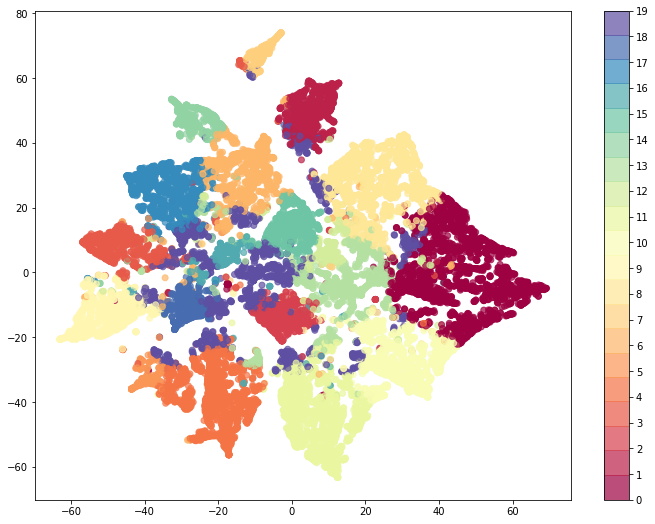

In [103]:
plt.subplots(figsize=(12,9))
plt.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], c=_lda_keys, alpha=0.7, cmap=plt.cm.get_cmap("Spectral", 20))
plt.colorbar(ticks=range(20))

In [100]:
labels_index

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}